In [1]:
import pandas as pd
from prophet import Prophet

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv', parse_dates=[0])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2905 non-null   datetime64[ns]
 1   y       2905 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 45.5 KB


In [9]:
prophet = Prophet()
prophet.fit(df)

08:08:36 - cmdstanpy - INFO - Chain [1] start processing
08:08:38 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future_df = prophet.make_future_dataframe(periods=365)

In [11]:
future_df

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
...,...
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18


In [18]:
forecast_df = prophet.predict(future_df)

In [19]:
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.034651,8.189324,9.471430,8.034651,8.034651,0.803099,0.803099,0.803099,0.352283,0.352283,0.352283,0.450816,0.450816,0.450816,0.0,0.0,0.0,8.837750
1,2007-12-11,8.033123,7.970835,9.188722,8.033123,8.033123,0.553199,0.553199,0.553199,0.119616,0.119616,0.119616,0.433583,0.433583,0.433583,0.0,0.0,0.0,8.586321
2,2007-12-12,8.031595,7.738722,9.003903,8.031595,8.031595,0.350636,0.350636,0.350636,-0.066649,-0.066649,-0.066649,0.417284,0.417284,0.417284,0.0,0.0,0.0,8.382230
3,2007-12-13,8.030067,7.705486,8.956145,8.030067,8.030067,0.330082,0.330082,0.330082,-0.072283,-0.072283,-0.072283,0.402365,0.402365,0.402365,0.0,0.0,0.0,8.360149
4,2007-12-14,8.028539,7.733983,8.984737,8.028539,8.028539,0.319666,0.319666,0.319666,-0.069565,-0.069565,-0.069565,0.389230,0.389230,0.389230,0.0,0.0,0.0,8.348204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2017-01-15,7.188260,7.426451,8.939085,6.844027,7.541632,1.018344,1.018344,1.018344,0.048303,0.048303,0.048303,0.970041,0.970041,0.970041,0.0,0.0,0.0,8.206605
3266,2017-01-16,7.187233,7.842443,9.256488,6.841009,7.542802,1.344356,1.344356,1.344356,0.352283,0.352283,0.352283,0.992073,0.992073,0.992073,0.0,0.0,0.0,8.531590
3267,2017-01-17,7.186206,7.626410,9.015654,6.838173,7.545720,1.132779,1.132779,1.132779,0.119616,0.119616,0.119616,1.013163,1.013163,1.013163,0.0,0.0,0.0,8.318985
3268,2017-01-18,7.185179,7.437379,8.910018,6.835667,7.546807,0.966458,0.966458,0.966458,-0.066649,-0.066649,-0.066649,1.033106,1.033106,1.033106,0.0,0.0,0.0,8.151637


In [20]:
forecast_df_select = forecast_df[['ds','yhat','yhat_lower','yhat_upper']]
forecast_df_select

,ds,yhat,yhat_lower,yhat_upper
0,2007-12-10,8.837750,8.189324,9.471430
1,2007-12-11,8.586321,7.970835,9.188722
2,2007-12-12,8.382230,7.738722,9.003903
3,2007-12-13,8.360149,7.705486,8.956145
4,2007-12-14,8.348204,7.733983,8.984737
...,...,...,...,...
3265,2017-01-15,8.206605,7.426451,8.939085
3266,2017-01-16,8.531590,7.842443,9.256488
3267,2017-01-17,8.318985,7.626410,9.015654
3268,2017-01-18,8.151637,7.437379,8.910018


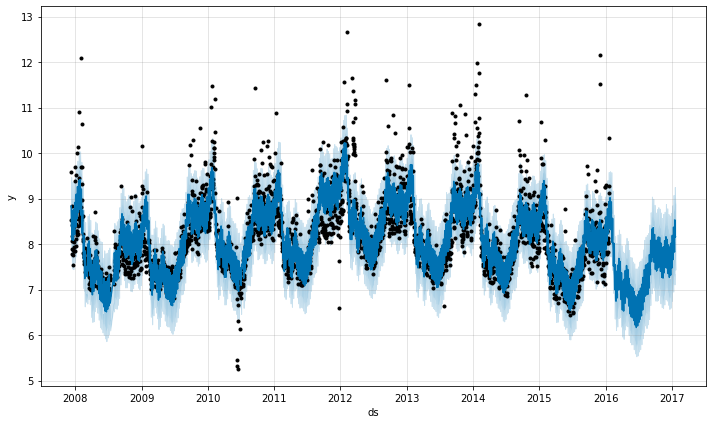

In [21]:
fig = prophet.plot(forecast_df_select)

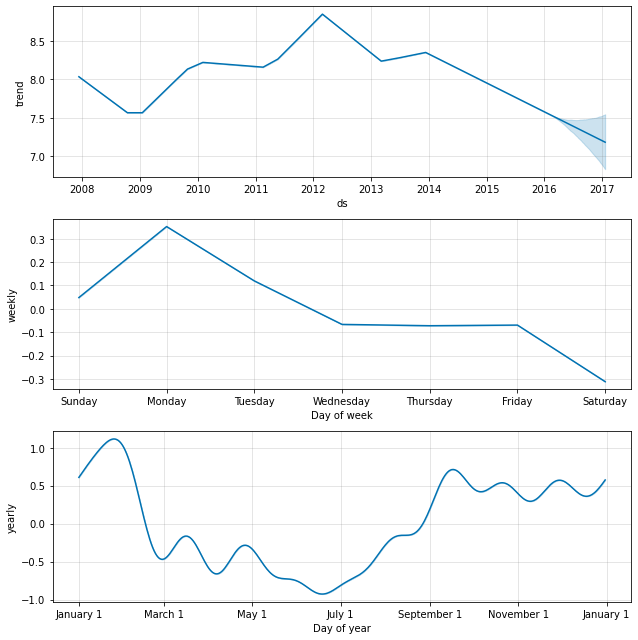

In [22]:
fig = prophet.plot_components(forecast_df)